# Exploratory Analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/drive/MyDrive/fake-news-classification/train (2).csv", sep=";")

In [5]:
df = df[['text', 'label']]
df

,text,label
0,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,While the controversy over Trump s personal ta...,0
3,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,There has never been a more UNCOURAGEOUS perso...,0
...,...,...
24348,MEXICO CITY (Reuters) - A key committee in Mex...,1
24349,IF SHE S NOT TOAST NOW THEN WE RE IN BIGGER TR...,0
24350,kremlin nato was created for agression \nruss...,0
24351,Dallas Cowboys star wide receiver Dez Bryant t...,0


## Label Distribution

label
1    13246
0    11107
Name: count, dtype: int64


<ipython-input-6-ee6f0b632d65>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Label', y='Count', data=category_counts, palette='pastel')


<Axes: title={'center': 'News Label distribution'}, xlabel='Label', ylabel='Count'>

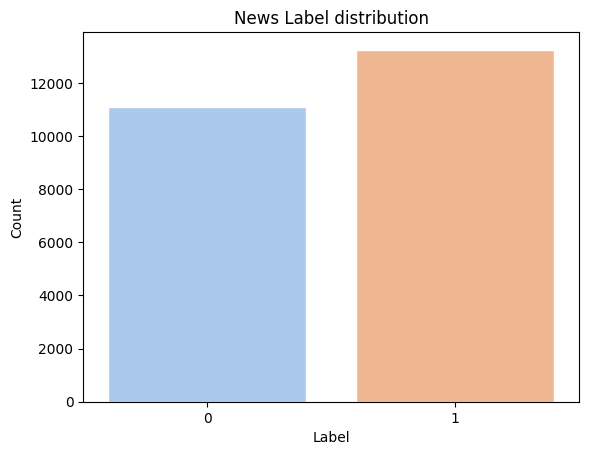

In [6]:
import seaborn as sns

print(df['label'].value_counts())

category_counts = df['label'].value_counts().reset_index()
category_counts.columns = ['Label', 'Count']

plt.title("News Label distribution")
plt.xlabel("Label")
plt.ylabel("Count")

sns.set_theme(style="whitegrid")
sns.barplot(x='Label', y='Count', data=category_counts, palette='pastel')

## Text size statistics

In [7]:
text_len_series = df['text'].apply(lambda x: len(x))
text_len_series.describe()

,text
count,24353.000000
mean,2501.703774
std,2114.691683
min,1.000000
25%,1301.000000
50%,2224.000000
75%,3131.000000
max,48835.000000


## True News Example

In [8]:
df.query("label == 1").text[0]

'RAMALLAH, West Bank (Reuters) - Palestinians switched off Christmas lights at Jesus  traditional birthplace in Bethlehem on Wednesday night in protest at U.S. President Donald Trump s decision to recognize Jerusalem as Israel s capital. A Christmas tree adorned with lights outside Bethlehem s Church of the Nativity, where Christians believe Jesus was born, and another in Ramallah, next to the burial site of former Palestinian leader Yasser Arafat, were plunged into darkness.  The Christmas tree was switched off on the order of the mayor today in protest at Trump s decision,  said Fady Ghattas, Bethlehem s municipal media officer.  He said it was unclear whether the illuminations would be turned on again before the main Christmas festivities. In a speech in Washington, Trump said he had decided to recognize Jerusalem as Israel s capital and move the U.S. embassy to the city. Israeli Prime Minister Benjamin Netanyahu said Trump s move  marked the beginning of a new approach to the Israe

## Fake News Example

In [9]:
df.query("label == 0").text[2]

'While the controversy over Trump s personal tax returns continues, business credit rating company Nav decided to take a look at his business  credit, and published the results on their website. Nav, which actually does have an A+ rating from the Better Business Bureau (as opposed to Trump U. s final rating), pulled together the factors affecting business credit scores and discovered something truly laughable.The highest possible business score is 100. The Trump Organization s score is 19. Nineteen. As in more than 15 but less than 20, and it s actually dropped 18 points. This puts the company in the medium to high-risk category:The organization is considered highly likely to default on its debts, and it averages sending payments 17 days late. They also have six derogatories, which can be delinquent loans that have been turned over to collections, as well as tax liens and judgments against the organization. According to Nav, that last one usually means the business was the defendant in

# Preprocessing

## Duplicates

In [10]:
df[df.duplicated(subset=['text'])]

,text,label
18813,"In its 109-year history, only one F.B.I. direc...",0


In [11]:
df.drop_duplicates(subset=['text'], inplace=True)

## Missing values

In [12]:
assert df.notna().size == df.size

## Lowercase

In [13]:
def to_lower(text):
  return text.lower()

In [14]:
df.text = df.text.apply(to_lower)

## Remove punctuation

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punct(text):
  return "".join([symbol for symbol in text if symbol not in string.punctuation])

In [17]:
df.text[0]

'ramallah, west bank (reuters) - palestinians switched off christmas lights at jesus  traditional birthplace in bethlehem on wednesday night in protest at u.s. president donald trump s decision to recognize jerusalem as israel s capital. a christmas tree adorned with lights outside bethlehem s church of the nativity, where christians believe jesus was born, and another in ramallah, next to the burial site of former palestinian leader yasser arafat, were plunged into darkness.  the christmas tree was switched off on the order of the mayor today in protest at trump s decision,  said fady ghattas, bethlehem s municipal media officer.  he said it was unclear whether the illuminations would be turned on again before the main christmas festivities. in a speech in washington, trump said he had decided to recognize jerusalem as israel s capital and move the u.s. embassy to the city. israeli prime minister benjamin netanyahu said trump s move  marked the beginning of a new approach to the israe

In [18]:
remove_punct(df.text[0])

'ramallah west bank reuters  palestinians switched off christmas lights at jesus  traditional birthplace in bethlehem on wednesday night in protest at us president donald trump s decision to recognize jerusalem as israel s capital a christmas tree adorned with lights outside bethlehem s church of the nativity where christians believe jesus was born and another in ramallah next to the burial site of former palestinian leader yasser arafat were plunged into darkness  the christmas tree was switched off on the order of the mayor today in protest at trump s decision  said fady ghattas bethlehem s municipal media officer  he said it was unclear whether the illuminations would be turned on again before the main christmas festivities in a speech in washington trump said he had decided to recognize jerusalem as israel s capital and move the us embassy to the city israeli prime minister benjamin netanyahu said trump s move  marked the beginning of a new approach to the israelipalestinian confli

In [19]:
df.text = df.text.apply(remove_punct)

## Tokenization

In [20]:
import re

def tokenize(text):
  return re.split("\W+", text)

tokenize("hello world")

['hello', 'world']

In [21]:
df.text = df.text.apply(tokenize)

## Stopwords

In [22]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [23]:
def remove_stopwords(sentence):
  return [word for word in sentence if word not in stopwords]

example = "Hello I am really happy that you will go with me".lower().split(" ")
result = remove_stopwords(example)

print(example)
print(result)

['hello', 'i', 'am', 'really', 'happy', 'that', 'you', 'will', 'go', 'with', 'me']
['hello', 'really', 'happy', 'go']


In [24]:
df.text = df.text.apply(remove_stopwords)

## Stemming

In [25]:
ps = nltk.PorterStemmer()

print(ps.stem("grows"))
print(ps.stem("growing"))
print(ps.stem("grow"))

grow
grow
grow


In [26]:
def stemm_word(tokenized_text):
  return [ps.stem(word) for word in tokenized_text]

In [27]:
df.text = df.text.apply(stemm_word)
df.text[0]

['ramallah',
 'west',
 'bank',
 'reuter',
 'palestinian',
 'switch',
 'christma',
 'light',
 'jesu',
 'tradit',
 'birthplac',
 'bethlehem',
 'wednesday',
 'night',
 'protest',
 'us',
 'presid',
 'donald',
 'trump',
 'decis',
 'recogn',
 'jerusalem',
 'israel',
 'capit',
 'christma',
 'tree',
 'adorn',
 'light',
 'outsid',
 'bethlehem',
 'church',
 'nativ',
 'christian',
 'believ',
 'jesu',
 'born',
 'anoth',
 'ramallah',
 'next',
 'burial',
 'site',
 'former',
 'palestinian',
 'leader',
 'yasser',
 'arafat',
 'plung',
 'dark',
 'christma',
 'tree',
 'switch',
 'order',
 'mayor',
 'today',
 'protest',
 'trump',
 'decis',
 'said',
 'fadi',
 'ghatta',
 'bethlehem',
 'municip',
 'media',
 'offic',
 'said',
 'unclear',
 'whether',
 'illumin',
 'would',
 'turn',
 'main',
 'christma',
 'festiv',
 'speech',
 'washington',
 'trump',
 'said',
 'decid',
 'recogn',
 'jerusalem',
 'israel',
 'capit',
 'move',
 'us',
 'embassi',
 'citi',
 'isra',
 'prime',
 'minist',
 'benjamin',
 'netanyahu',
 'sai

## Vectorization

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
df.text = df.text.apply(lambda x: " ".join(x))

In [30]:
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(df.text)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df

,00,000,0000,000000017,000004,000048,000063sz,00007,00009,0001,...,überraschend,überrascht,überreden,überreicht,überschwänglich,übertrieben,überwacht,überwachungskamera,übrig,übte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Final Preprocessing Pipeline

In [32]:
import nltk
import re
import string

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stopwords = nltk.corpus.stopwords.words('english')

def to_lower(text):
  return text.lower()

def remove_punct(text):
  return "".join([symbol for symbol in text if symbol not in string.punctuation])

def tokenize(text):
  return re.split("\W+", text)

def remove_stopwords(sentence):
  return [word for word in sentence if word not in stopwords]

def stemm_word(tokenized_text):
    ps = nltk.PorterStemmer()
    return [ps.stem(word) for word in tokenized_text]


def preprocess(series):
    series = (
        series
            .apply(to_lower)
            .apply(remove_punct)
            .apply(tokenize)
            .apply(remove_stopwords)
            .apply(stemm_word)
    )

    return series

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [33]:
df = pd.read_csv("/content/drive/MyDrive/fake-news-classification/test (1).csv", sep=";")
df

,Unnamed: 0,title,text,label
0,0,"Live from New York, it's a Trump-Clinton remat...",NEW YORK (Reuters) - Veteran actor and frequen...,1
1,1,Catalan separatists to lose majority in tight ...,BARCELONA (Reuters) - Catalonia s independence...,1
2,2,North Carolina governor concedes election to D...,"WINSTON-SALEM, N.C. (Reuters) - North Carolina...",1
3,3,Draft Senate Iran legislation sets tough new U...,WASHINGTON (Reuters) - Draft legislation respo...,1
4,4,California governor taps U.S. Representative B...,"SACRAMENTO, Calif. (Reuters) - California Gove...",1
...,...,...,...,...
8112,8112,Sanders at Vatican says rich-poor gap worse th...,VATICAN CITY (Reuters) - U.S. presidential can...,1
8113,8113,how trump happened,force and fanaticism wahhabism in saudi arabi...,1
8114,8114,Turkey will take two steps if Germany takes on...,"ISTANBUL (Reuters) - Turkey, whose relations w...",1
8115,8115,BREAKING: DEVICE THAT BUSTED HILLARY CLINTON D...,Here s why Clinton and Abedin should be flippi...,0


In [34]:
df_test = preprocess(df['text'])
df_test

,text
0,"[new, york, reuter, veteran, actor, frequent, ..."
1,"[barcelona, reuter, catalonia, independ, movem..."
2,"[winstonsalem, nc, reuter, north, carolina, go..."
3,"[washington, reuter, draft, legisl, respond, u..."
4,"[sacramento, calif, reuter, california, govern..."
...,...
8112,"[vatican, citi, reuter, us, presidenti, candid..."
8113,"[forc, fanatic, wahhab, saudi, arabia, beyond,..."
8114,"[istanbul, reuter, turkey, whose, relat, germa..."
8115,"[clinton, abedin, flip, multipl, state, employ..."


# Train Test Validation Split

In [35]:
import os
import pandas as pd

In [36]:
BASE_DIR = '/content/drive/MyDrive/fake-news-classification'

train_path = os.path.join(BASE_DIR, "train (2).csv")
val_path = os.path.join(BASE_DIR, "evaluation.csv")
test_path = os.path.join(BASE_DIR, "test (1).csv")

In [37]:
train_df = pd.read_csv(train_path, sep=";")
val_df = pd.read_csv(val_path, sep=";")
test_df = pd.read_csv(test_path, sep=";")

In [38]:
train_df = train_df[['text', 'label']]
val_df = val_df[['text', 'label']]
test_df = test_df[['text', 'label']]

In [39]:
train_df.drop_duplicates(subset=['text'], inplace=True)
val_df.drop_duplicates(subset=['text'], inplace=True)
test_df.drop_duplicates(subset=['text'], inplace=True)

In [40]:
assert train_df.notna().size == train_df.size
assert val_df.notna().size == val_df.size
assert test_df.notna().size == test_df.size

In [ ]:
train_df.text = preprocess(train_df.text)

In [ ]:
test_df.text = preprocess(test_df.text)

In [ ]:
val_df.text = preprocess(val_df.text)

In [ ]:
train_df.text = train_df.text.apply(lambda x: " ".join(x))

In [ ]:
test_df.text = test_df.text.apply(lambda x: " ".join(x))

In [ ]:
val_df.text = val_df.text.apply(lambda x: " ".join(x))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(train_df.text.to_list())
X_val_tfidf = vectorizer.transform(val_df.text.to_list())
X_test_tfidf = vectorizer.transform(test_df.text.to_list())

y_train = train_df.label
y_val = val_df.label
y_test = test_df.label

print(X_train_tfidf.shape)
print(X_val_tfidf.shape)
print(X_test_tfidf.shape)

In [ ]:
vectorizer.get_feature_names_out()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Train & Predict

In [ ]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)  # Train the model

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

## Evaluation

In [ ]:
y_pred = model.predict(X_val_tfidf)

# Evaluation
print("Classification Report:")
print(classification_report(y_val, y_pred))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

report = classification_report(y_val, y_pred, output_dict=True)

# Step 3: Convert report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Step 4: Select relevant rows and metrics
metrics = df_report.loc[['0', '1'], ['precision', 'recall', 'f1-score']]

# Step 5: Plot the metrics
metrics.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'orange', 'lightgreen'])
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.ylim(0, 1.1)  # Metrics range from 0 to 1
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#LSTM

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Tokenize
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_train_pad = pad_sequences(X_train_seq, maxlen=200, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=200, padding='post')

# Label encode
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)




In [ ]:
# Build LSTM model
model = Sequential([
    Embedding(10000, 64, input_length=200),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pad, y_train_enc, epochs=3, batch_size=64, validation_data=(X_val_pad, y_val_enc))

# Predict
y_pred = (model.predict(X_val_pad) > 0.5).astype("int32")



In [ ]:
# Classification report
report = classification_report(y_val_enc, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()



In [ ]:
# Plot
report_df[:-1][['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('LSTM Classification Report')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#BERT Text Classification

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

# Convert to HuggingFace dataset format
train_ds = Dataset.from_pandas(pd.DataFrame({"text": X_train, "label": y_train}))
val_ds = Dataset.from_pandas(pd.DataFrame({"text": X_val, "label": y_val}))

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=256)

train_ds = train_ds.map(tokenize, batched=True)
val_ds = val_ds.map(tokenize, batched=True)

train_ds.set_format("torch", columns=["input_ids", "attention_mask", "label"])
val_ds.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# Load model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    evaluation_strategy="epoch",
    save_strategy="no",
    logging_dir="./logs",
    logging_steps=50,
    load_best_model_at_end=False,
)

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
)

# Train
trainer.train()

# Predict
predictions = trainer.predict(val_ds)
y_pred = np.argmax(predictions.predictions, axis=1)



In [ ]:
# Evaluation
report = classification_report(y_val, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()




In [ ]:
# Plot
report_df[:-1][['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('BERT Classification Report')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#Naïve Bayes Text Classification

In [ ]:

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Predict
y_pred_nb = nb_model.predict(X_val_vec)




In [ ]:
# Classification report
nb_report = classification_report(y_val, y_pred_nb, output_dict=True)
nb_df = pd.DataFrame(nb_report).transpose()



In [ ]:
# Plot
nb_df[:-1][['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Naïve Bayes Classification Report')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()

#SVM

In [ ]:
from sklearn.svm import LinearSVC

# Train SVM
svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)

# Predict
y_pred_svm = svm_model.predict(X_val_vec)



In [ ]:
# Classification report
svm_report = classification_report(y_val, y_pred_svm, output_dict=True)
svm_df = pd.DataFrame(svm_report).transpose()



In [ ]:
# Plot
svm_df[:-1][['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('SVM Classification Report')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()
